## Bioinformatics - Data Collection and Pre-Processing

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('CHEMBL2146302')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,"Glutaminase kidney isoform, mitochondrial",14.0,False,CHEMBL2146302,"[{'accession': 'O94925', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Glutaminase 1/2,12.0,False,CHEMBL4106183,"[{'accession': 'O94925', 'component_descriptio...",PROTEIN FAMILY,9606


In [3]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="Potency")

In [4]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,active,11402574,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,5.8048
1,None,inconclusive,11402575,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,29.0929
2,None,active,11402576,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,3.2643
3,None,inconclusive,11402577,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,32.6427
4,None,inconclusive,11402578,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,29.0929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,None,inactive,11492015,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,14.1254
15582,None,inactive,11492016,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,31.6228
15583,None,inconclusive,11492017,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,35.4813
15584,None,inconclusive,11492018,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,None,None,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,Potency,uM,UO_0000065,None,35.4813


In [6]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [7]:
import pandas as pd
df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})

In [8]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,active,11402574,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,5.8048
1,NaN,inconclusive,11402575,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,29.0929
2,NaN,active,11402576,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,3.2643
3,NaN,inconclusive,11402577,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,32.6427
4,NaN,inconclusive,11402578,[],CHEMBL2114880,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,29.0929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,NaN,inactive,11492015,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,14.1254
15582,NaN,inactive,11492016,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,31.6228
15583,NaN,inconclusive,11492017,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,35.4813
15584,NaN,inconclusive,11492018,[],CHEMBL2114738,PubChem BioAssay. qHTS for Inhibitors of Gluta...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,NaN,NaN,Potency,uM,UO_0000065,NaN,35.4813


In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (15586, 46) and (15542, 46)


In [10]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1339275,COc1cc(OC)c(S(=O)(=O)Nc2ccccc2C(=O)O)cc1S(=O)(...,5804.8
1,CHEMBL1592105,O=C(Nc1ccccc1O)c1cccc(S(=O)(=O)Nc2ccccc2O)c1,29092.9
2,CHEMBL1374603,COc1ccc(NS(=O)(=O)c2ccc3c(c2)[C@H]2C=CC[C@H]2[...,3264.3
3,CHEMBL1519239,Cc1ccc(S(=O)(=O)Nc2cc(Cl)c(O)c3ncccc23)cc1,32642.7
4,CHEMBL1378953,O=C(O)c1cccc(S(=O)(=O)Nc2ccc(O)cc2Sc2nc3ccccc3...,29092.9
...,...,...,...
15537,CHEMBL1572265,CCN(CC)c1ccc(NC(=O)c2cccc(OC)c2)c(C)c1,14125.4
15538,CHEMBL1496441,Cc1ccc(NC(=O)c2noc3c2CCC3)cc1C,31622.8
15539,CHEMBL1472404,O=C(O)c1cc(-c2cccc(Cl)c2)nc2nc(N3CCCCC3)sc12,35481.3
15540,CHEMBL1475901,CCOC(=O)c1c(NC(=O)c2c(C(=O)O)cccc2[N+](=O)[O-]...,35481.3


In [11]:
df3.standard_value.describe()

count     15542.00000
mean      19670.95904
std       11179.62217
min          89.10000
25%       11220.20000
50%       17782.80000
75%       31622.80000
max      251188.60000
Name: standard_value, dtype: float64

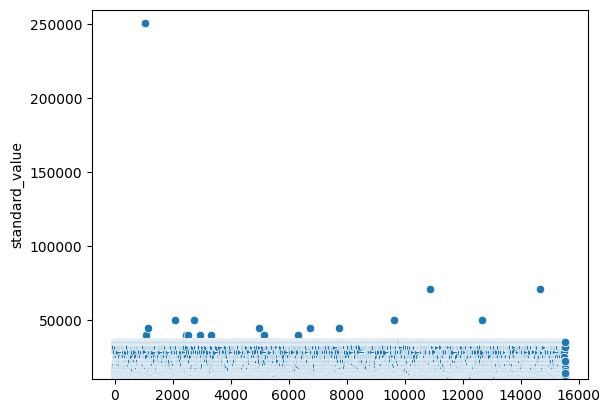

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df3.index, y='standard_value', data=df3)
plt.ylim(10000, 260000)
plt.show()

In [26]:
high_IC50_rows = df3[df3['standard_value'] > 50000].index
high_IC50_rows

Index([1045, 2081, 2751, 9646, 10874, 12675, 14659], dtype='int64')

In [28]:
df_final = df3[df3['standard_value'] <= 50000]
df_final

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1339275,COc1cc(OC)c(S(=O)(=O)Nc2ccccc2C(=O)O)cc1S(=O)(...,5804.8
1,CHEMBL1592105,O=C(Nc1ccccc1O)c1cccc(S(=O)(=O)Nc2ccccc2O)c1,29092.9
2,CHEMBL1374603,COc1ccc(NS(=O)(=O)c2ccc3c(c2)[C@H]2C=CC[C@H]2[...,3264.3
3,CHEMBL1519239,Cc1ccc(S(=O)(=O)Nc2cc(Cl)c(O)c3ncccc23)cc1,32642.7
4,CHEMBL1378953,O=C(O)c1cccc(S(=O)(=O)Nc2ccc(O)cc2Sc2nc3ccccc3...,29092.9
...,...,...,...
15537,CHEMBL1572265,CCN(CC)c1ccc(NC(=O)c2cccc(OC)c2)c(C)c1,14125.4
15538,CHEMBL1496441,Cc1ccc(NC(=O)c2noc3c2CCC3)cc1C,31622.8
15539,CHEMBL1472404,O=C(O)c1cc(-c2cccc(Cl)c2)nc2nc(N3CCCCC3)sc12,35481.3
15540,CHEMBL1475901,CCOC(=O)c1c(NC(=O)c2c(C(=O)O)cccc2[N+](=O)[O-]...,35481.3


In [29]:
import numpy as np
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)
        
    return x

In [30]:
df_final = pIC50(df_final)
df_final

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_65825/2493827041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['pIC50'] = pIC50


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL1339275,COc1cc(OC)c(S(=O)(=O)Nc2ccccc2C(=O)O)cc1S(=O)(...,5.236213
1,CHEMBL1592105,O=C(Nc1ccccc1O)c1cccc(S(=O)(=O)Nc2ccccc2O)c1,4.536213
2,CHEMBL1374603,COc1ccc(NS(=O)(=O)c2ccc3c(c2)[C@H]2C=CC[C@H]2[...,5.486210
3,CHEMBL1519239,Cc1ccc(S(=O)(=O)Nc2cc(Cl)c(O)c3ncccc23)cc1,4.486214
4,CHEMBL1378953,O=C(O)c1cccc(S(=O)(=O)Nc2ccc(O)cc2Sc2nc3ccccc3...,4.536213
...,...,...,...
15537,CHEMBL1572265,CCN(CC)c1ccc(NC(=O)c2cccc(OC)c2)c(C)c1,4.849999
15538,CHEMBL1496441,Cc1ccc(NC(=O)c2noc3c2CCC3)cc1C,4.500000
15539,CHEMBL1472404,O=C(O)c1cc(-c2cccc(Cl)c2)nc2nc(N3CCCCC3)sc12,4.450000
15540,CHEMBL1475901,CCOC(=O)c1c(NC(=O)c2c(C(=O)O)cccc2[N+](=O)[O-]...,4.450000


In [31]:
df_final.pIC50.describe()

count    15535.000000
mean         4.807634
std          0.354758
min          4.350000
25%          4.500000
50%          4.750000
75%          4.949999
max          7.050122
Name: pIC50, dtype: float64

In [32]:
df_final.to_csv('data/Preprocessed_15535x3.csv',index=False)

## Dataset Preparation

In [33]:
import pandas as pd
df = pd.read_csv('data/Preprocessed_15535x3.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL1339275,COc1cc(OC)c(S(=O)(=O)Nc2ccccc2C(=O)O)cc1S(=O)(...,5.236213
1,CHEMBL1592105,O=C(Nc1ccccc1O)c1cccc(S(=O)(=O)Nc2ccccc2O)c1,4.536213
2,CHEMBL1374603,COc1ccc(NS(=O)(=O)c2ccc3c(c2)[C@H]2C=CC[C@H]2[...,5.486210
3,CHEMBL1519239,Cc1ccc(S(=O)(=O)Nc2cc(Cl)c(O)c3ncccc23)cc1,4.486214
4,CHEMBL1378953,O=C(O)c1cccc(S(=O)(=O)Nc2ccc(O)cc2Sc2nc3ccccc3...,4.536213
...,...,...,...
15530,CHEMBL1572265,CCN(CC)c1ccc(NC(=O)c2cccc(OC)c2)c(C)c1,4.849999
15531,CHEMBL1496441,Cc1ccc(NC(=O)c2noc3c2CCC3)cc1C,4.500000
15532,CHEMBL1472404,O=C(O)c1cc(-c2cccc(Cl)c2)nc2nc(N3CCCCC3)sc12,4.450000
15533,CHEMBL1475901,CCOC(=O)c1c(NC(=O)c2c(C(=O)O)cccc2[N+](=O)[O-]...,4.450000


In [34]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [35]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-25 20:44:39--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-25 20:44:40--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  28.3MB/s    in 0.9s    

2023-07-25 20:44:42 (28.3 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-07-25 20:44:42-

In [36]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [37]:
! bash padel.sh

Processing CHEMBL1339275 in molecule.smi (1/15535). 
Processing CHEMBL1374603 in molecule.smi (3/15535). 
Processing CHEMBL1592105 in molecule.smi (2/15535). 
Processing CHEMBL1519239 in molecule.smi (4/15535). 
Processing CHEMBL1378953 in molecule.smi (5/15535). 
Processing CHEMBL1333250 in molecule.smi (6/15535). 
Processing CHEMBL1531546 in molecule.smi (7/15535). 
Processing CHEMBL1387163 in molecule.smi (8/15535). 
Processing CHEMBL1391464 in molecule.smi (10/15535). Average speed: 2.01 s/mol.
Processing CHEMBL1383966 in molecule.smi (9/15535). Average speed: 3.93 s/mol.
Processing CHEMBL1434285 in molecule.smi (12/15535). Average speed: 1.36 s/mol.
Processing CHEMBL3211557 in molecule.smi (11/15535). Average speed: 2.04 s/mol.
Processing CHEMBL1734350 in molecule.smi (13/15535). Average speed: 0.82 s/mol.
Processing CHEMBL1409338 in molecule.smi (14/15535). Average speed: 0.82 s/mol.
Processing CHEMBL1417701 in molecule.smi (15/15535). Average speed: 0.59 s/mol.
Processing CHEMBL

In [38]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv',index=False)
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1387163,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1519239,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1378953,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1592105,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1339275,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15530,CHEMBL1472404,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15531,CHEMBL1610866,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15532,CHEMBL1572265,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15533,CHEMBL1475901,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15530,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15531,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15532,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15533,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df3_X.to_csv('data/Xdata_15535x881.csv',index = False)

In [41]:
df = pd.read_csv('data/Preprocessed_15535x3.csv')
df3_Y = df['pIC50']
df3_Y

0        5.236213
1        4.536213
2        5.486210
3        4.486214
4        4.536213
           ...   
15530    4.849999
15531    4.500000
15532    4.450000
15533    4.450000
15534    4.849999
Name: pIC50, Length: 15535, dtype: float64

In [42]:
df3_Y.describe()

count    15535.000000
mean         4.807634
std          0.354758
min          4.350000
25%          4.500000
50%          4.750000
75%          4.949999
max          7.050122
Name: pIC50, dtype: float64

In [43]:
df3_Y.to_csv('data/Ydata_15535.csv',index = False)

## Removing features

In [60]:
import pandas as pd
import seaborn as sns
import pickle

In [45]:
X = pd.read_csv('data/Xdata_15535x881.csv')
Y = pd.read_csv('data/Ydata_15535.csv')

In [46]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.02)
X = selection.fit(X)
len(list(selection.get_feature_names_out()))

439

In [47]:
features_list = list(selection.get_feature_names_out())

In [49]:
X = pd.read_csv('data/Xdata_15535x881.csv')
X = X[features_list]
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP812,PubchemFP818,PubchemFP819,PubchemFP820,PubchemFP821,PubchemFP822,PubchemFP824,PubchemFP826,PubchemFP830,PubchemFP833
0,0,0,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,0,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,1,1,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15530,1,0,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15531,1,0,1,1,1,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
15532,1,0,1,1,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
15533,1,0,1,1,1,0,1,1,1,0,...,0,1,0,1,1,0,0,0,0,0


<Axes: >

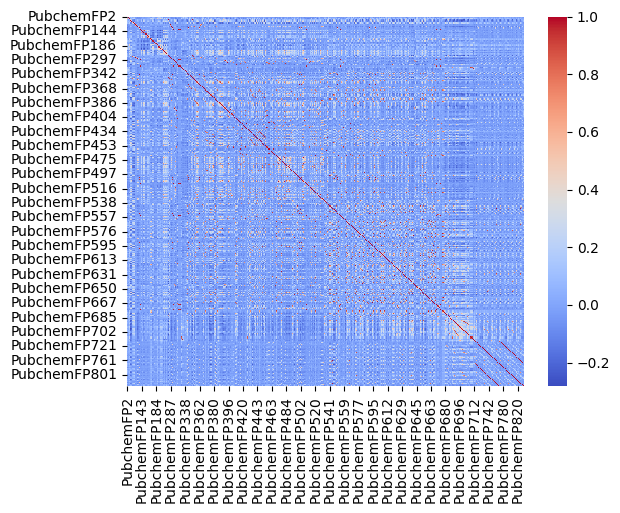

In [50]:
# Create a correlation matrix
X_corr = pd.DataFrame(X)
corr_matrix = X_corr.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [51]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
len(to_drop)
# X_corrdel = X_corr.drop(to_drop, axis=1)
# #X_corrdel.to_csv('data/Xdata_correlationdropped_7546x129.csv')
# X_corrdel.shape

228

In [52]:
df_final = X.drop(to_drop,axis=1)
df_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP746,PubchemFP749,PubchemFP755,PubchemFP756,PubchemFP757,PubchemFP758,PubchemFP759,PubchemFP763,PubchemFP767,PubchemFP770
0,0,0,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,1,1,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15530,1,0,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15531,1,0,1,1,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
15532,1,0,1,1,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
15533,1,0,1,1,1,0,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0


<Axes: >

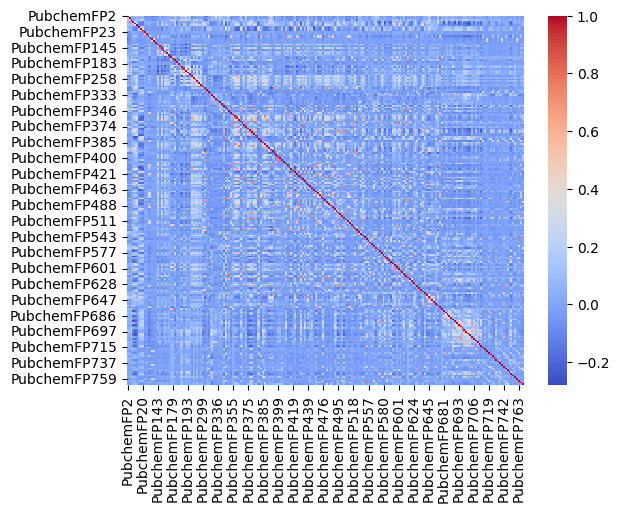

In [53]:
corr_matrix = df_final.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [54]:
df_final.to_csv('data/XdataFinal_15535x211.csv',index = False)

In [55]:
selected_features = df_final.columns.tolist()
len(selected_features)

211

In [56]:
pickle.dump((selected_features),open('data/selected_features.pkl','wb'))

## Regressor Model Training

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [57]:
X = pd.read_csv('data/XdataFinal_15535x211.csv')
X.shape

(15535, 211)

In [58]:
X = X.to_numpy()
print(X.shape)
print(type(X))

(15535, 211)
<class 'numpy.ndarray'>


In [59]:
Y = pd.read_csv('data/Ydata_15535.csv')
Y = Y.pIC50
print(Y.shape)
print(type(Y))

(15535,)
<class 'pandas.core.series.Series'>


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [63]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [04:42<00:00,  6.73s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [03:57<00:00,  5.66s/it]


In [64]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.98,0.98,0.05,0.41
ExtraTreeRegressor,0.98,0.98,0.05,0.39
ExtraTreesRegressor,0.98,0.98,0.05,21.19
GaussianProcessRegressor,0.98,0.98,0.05,45.51
RandomForestRegressor,0.83,0.83,0.15,15.49
MLPRegressor,0.81,0.82,0.15,16.41
BaggingRegressor,0.77,0.77,0.17,1.74
XGBRegressor,0.53,0.53,0.24,1.86
NuSVR,0.51,0.51,0.25,62.92


In [65]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,-0.07,0.00,0.35,0.35
LassoLarsCV,-0.07,0.00,0.35,0.38
LarsCV,-0.07,0.00,0.35,0.40
LassoCV,-0.07,0.00,0.35,1.34
ElasticNetCV,-0.07,0.00,0.35,2.38
LassoLarsIC,-0.07,0.00,0.35,0.57
Lasso,-0.07,-0.00,0.35,0.16
LassoLars,-0.07,-0.00,0.35,0.26
ElasticNet,-0.07,-0.00,0.35,0.07


## Artificial Neural Network

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Lambda
from tensorflow.keras import regularizers
from keras.optimizers.legacy import Adam,Adagrad,Adamax
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [67]:
X = pd.read_csv('data/XdataFinal_15535x211.csv')
X = X.to_numpy()
Y = pd.read_csv('data/Ydata_15535.csv')
Y = Y.pIC50

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=30)

In [69]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(15535, 211)
(15535,)
(12428, 211)
(3107, 211)


In [72]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(211,), kernel_regularizer=regularizers.l2(0.01))) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu')) # reduced regularization
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))  # changed activation function
optimizer = Adamax(learning_rate=0.00001)
model.compile(loss="mean_absolute_error", optimizer=optimizer, metrics=['mae'])  # use the instantiated optimizer

history = model.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_test, y_test))

# The rest of the code remains the same...

Epoch 1/250
1243/1243 [==============================] - 2s 2ms/step - loss: 8.1244 - mae: 1.8922 - val_loss: 6.7267 - val_mae: 0.6235
Epoch 2/250
1243/1243 [==============================] - 2s 2ms/step - loss: 6.7454 - mae: 0.7590 - val_loss: 6.4086 - val_mae: 0.5359
Epoch 3/250
1243/1243 [==============================] - 2s 2ms/step - loss: 6.4495 - mae: 0.6838 - val_loss: 6.1659 - val_mae: 0.5043
Epoch 4/250
1243/1243 [==============================] - 2s 2ms/step - loss: 6.1905 - mae: 0.6273 - val_loss: 5.9232 - val_mae: 0.4555
Epoch 5/250
1243/1243 [==============================] - 2s 2ms/step - loss: 5.9658 - mae: 0.5881 - val_loss: 5.7441 - val_mae: 0.4544
Epoch 6/250
1243/1243 [==============================] - 2s 2ms/step - loss: 5.7808 - mae: 0.5751 - val_loss: 5.6098 - val_mae: 0.4859
Epoch 7/250
1243/1243 [==============================] - 2s 2ms/step - loss: 5.6001 - mae: 0.5542 - val_loss: 5.4357 - val_mae: 0.4666
Epoch 8/250
1243/1243 [==============================] 

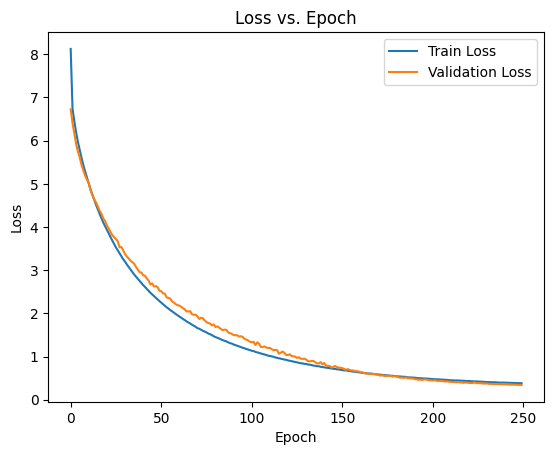

In [73]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, x_pred)
# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)
print('R-squared score for training set:', r2_x)

98/98 [==============================] - 0s 830us/step - loss: 0.3436 - mae: 0.2682
Test loss: 0.34357690811157227
Test accuracy: 0.2682354152202606
R-squared score: -0.07210356510182336
R-squared score for training set: 0.00977251281949576


In [75]:
y_pred

array([[4.745716 ],
       [4.8597326],
       [4.7628846],
       ...,
       [4.728209 ],
       [4.6889515],
       [4.742079 ]], dtype=float32)

98/98 [==============================] - 0s 712us/step


<Axes: ylabel='pIC50'>

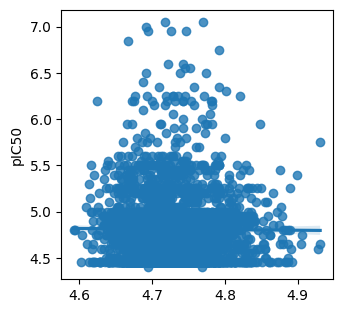

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
y_predicted = model.predict(X_test)
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_predicted, y = y_test, fit_reg=True)

## Final Model saving

In [94]:
X = pd.read_csv('data/XdataFinal_10467x176.csv')
Y = pd.read_csv('data/Ydata_10467.csv')

<Axes: xlabel='pIC50'>

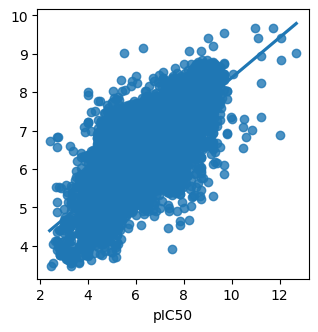

In [95]:
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
model = ltb.LGBMRegressor()
model.fit(X,Y)
y_predicted = model.predict(X)
y_expected = Y
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_expected, y = y_predicted, fit_reg=True)

In [96]:
import pickle
pickle.dump(model,open('data/trained_model.pkl','wb'))